# Generate Hologram parameters in Spectractor For AuxTel

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : March 2 st 2021
- version 0

# Imports

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is


plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [10]:
FLAG_HOMOTHETIE   = True
FLAG_STEPOPTIMIZE = False

# constants

- all transverse physical coordinates are in mm and relative to beam optical center (at CCD center)

In [11]:
# conversion in good inits
u_radtodeg=180.0/np.pi
u_degtorad=np.pi/180.
u_mtomm=1e3

- all constants are refered as $c\_$

In [12]:
c_F=18.0*1.2*u_mtomm # Auxtel Focla length # ou 13.7m

In [13]:
c_F

21599.999999999996

In [14]:
c_Z1=200. # mm, distance between hologram and source plane during holo recording
c_Z0=178. # mm, distance between hologram and CCD plane for observations 

In [15]:
c_d1=20.0 # mm, distance between the sources during recording 

In [16]:
c_X_Oh=-7  # mm , x-coordinates of the hologram optical center in the CCD ref frame
c_Y_Oh=2.55 # mm , y-coordinate of the hologram optical center in the CCD ref frame

In [17]:
c_beta0=-0.275 #degree , angle of rotation of hologram source axis wrt CCD  

In [123]:
c_wl0 = 639*1e-6

In [129]:
c_Nx_Pix=4096
c_Ny_Pix=4096
c_Pix_Size= 1e-2 # mm

In [130]:
c_Nx_Pix*c_Pix_Size

40.96

# Functions

- $(X,Y)$ : coordinates in CCD frame with telecope optical center as the origin
- $(x,y)$ : coordinates in hologram frame with telecope optical center as the origin the same reference axis as the CCD
- $(x_1,y_1)$ : coordinates in hologram reference frame, with telecope optical center as the origin, such the two sources A $(x_1(A),y_1(A))$ and B $(x_1(B),y_1(B))$ have coordinates:
$$
x_1(A)= x_1 (0)-d_1/2 
$$
$$
y_1(A)= y_1(0)
$$
$$
x_1(B)= x_1 (0)+d_1/2 
$$
$$
y_1(B)= y_1(0)
$$

In [132]:
def XYtoCCDpix(X,Y):
    
    i_pix_x= c_Nx_Pix/2+X/c_Pix_Size
    i_pix_y= c_Ny_Pix/2+Y/c_Pix_Size
    
    return i_pix_x,i_pix_y

In [18]:
def XYtoxy(XY,Z):
    """
    XYtoxy(XY,Z): convert coordinates in CCD plane (R) to the CCD plane projected at hologram plane.
    The origin of the coordinates is always the optical center of the telescope.
    
    The coordinates undergo an homothetie.
    
    
    
    input parameters
    - XY : numpy array of the 2-coordinates in CCD in mm
    - Z : distance between hologram and CCD in mm (positive)
    
    output parameter 
    - xy : numpy array of the 2-coordinates in  in mm at hologram position
    """
    XY=np.array(XY)
    
    if FLAG_HOMOTHETIE:
        xy=(1-Z/c_F)*XY  #small contraction
    else:
        xy=XY
    
    return xy  

In [19]:
def XYtoxy_2D(X,Y,Z):
    """
    XYtoxy(XY,Z): convert coordinates in CCD plane (R) to the CCD plane projected at hologram plane.
    The origin of the coordinates is always the optical center of the telescope.
    
    The coordinates undergo an homothetie.
    
    
    
    input parameters
    - XY : numpy array of the 2-coordinates in CCD in mm
    - Z : distance between hologram and CCD in mm (positive)
    
    output parameter 
    - xy : numpy array of the 2-coordinates in  in mm at hologram position
    """
    if FLAG_HOMOTHETIE:
        x=(1-Z/c_F)*X  #small contraction
        y=(1-Z/c_F)*Y  #small contraction
    else:
        x=X
        y=Y
    
    return x,y  

In [20]:
def xytoXY(xy,Z):
    """
    xytoXY(xy,Z): convert coordinates in hologram plane to CCD plane.
    The origin of the coordinates is always the optical center of the telescope.
    
    input parameters
    - xy : numpy array of the 2-coordinates in  in mm
    - Z : distance between hologram and CCD in mm (positive)
    
    output parameter 
    - XY : numpy array of the 2-coordinates in CCD in mm
    
    """
    xy=np.array(xy)
    
    if FLAG_HOMOTHETIE:
        XY=1./(1-Z/c_F)*xy #small dilatation
    else:
        XY=xy
    
    return XY  

In [21]:
def xytoXY_2D(x,y,Z):
    """
    xytoXY(xy,Z): convert coordinates in hologram plane to CCD plane.
    The origin of the coordinates is always the optical center of the telescope.
    
    input parameters
    - xy : numpy array of the 2-coordinates in  in mm
    - Z : distance between hologram and CCD in mm (positive)
    
    output parameter 
    - XY : numpy array of the 2-coordinates in CCD in mm
    
    """
    if FLAG_HOMOTHETIE: 
        X=1./(1-Z/c_F)*x #small dilatation
        Y=1./(1-Z/c_F)*y #small dilatation
    else:
        X=x
        Y=y
    
    return X,Y  

In [22]:
def xytox1y1(xy,beta,x0,y0):
    """
    xytox1y1(xy,alpha): convert coordinates in hologram plane (same ref axis as CCD) with origin at O, the optical center
    of the telescope the instrinsic hologram frame with origin Oh, the optical center of the hologram.
    
    Both system are rotated by an angle beta such the Oh-x1 axis is parallel to sources A,B)
    
    input parameters
    - xy : numpy array of the 2-coordinates in hologram which ref axis are those of CCD and origin is O
    - beta : angle in degree
    
    - (x0,y0) : coordinate of hologram geometrical Oh (projected at hologram plane)
    
    output parameter 
    - x1y1 : mm, numpy array of the 2-coordinates in the intrinsic hologram frame
    
    """
    
    cos_beta=np.cos(beta*u_degtorad)
    sin_beta=np.sin(beta*u_degtorad)
    x=xy[0]-x0
    y=xy[1]-y0   
    x1y1=np.array([cos_beta*x+sin_beta*y,-sin_beta*x+cos_beta*y])
    return x1y1
    
 

In [23]:
def xytox1y1_2D(x,y,beta,x0,y0):
    """
    
    2D version of function xytox1y1()
    
    convert coordinates in hologram plane (same ref axis as CCD) with origin at O, the optical center
    of the telescope the instrinsic hologram frame with origin Oh, the optical center of the hologram.
    
    Both system are rotated by an angle beta such the Oh-x1 axis is parallel to sources A,B)
     
    
    input parameters
    - x,y : 2D-numpy array of the 2-coordinates in hologram plane which ref axis are those of CCD and origin is O
    - alpha : angle in degree
    
    - (x0,y0) : coordinate of hologram geometrical Oh in CCD axis frame projected at hologram plane
    Usually x0,y0 are 2D arrays representing 
    the various hypothesis on Oh position when computing a Chi2 
    
    output parameter 
    - x1,y1 : mm, 2D-numpy array of the 2-coordinates in the intrinsic hologram frame
    
    """
    
    cos_beta=np.cos(beta*u_degtorad)
    sin_beta=np.sin(beta*u_degtorad)
    
    x=x-x0
    y=y-y0
    
    x1=cos_beta*x+sin_beta*y
    y1=-sin_beta*x+cos_beta*y
       
    
    return x1,y1

In [24]:
def x1y1toxy(x1y1,beta,x0,y0):
    """
    x1y1toxy(x1y1,beta,x0,y0): convert coordinates in the intrinsic hologram frame R1h to the hologram frame Rh
    with same axis as CCD , both frame being rotated by a relative angle beta
    
    input parameters
    - x1y1 : mm, numpy array of the 2-coordinates in the intrinsic hologram frame  R1h
    - beta : angle in degree
    - (x0,y0) : coordinate of hologram geometrical Oh in CCD axis frame but projected at hologram plane
    
    output parameter 
     - xy : numpy array of the 2-coordinates in hologram which ref axis are those of CCD mm
   
    
    """
    
    cos_beta=np.cos(beta*u_degtorad)
    sin_beta=np.sin(beta*u_degtorad)
    
    x1=x1y1[0]
    y1=x1y1[1]
    
    # note the coordinate are shifted wrt Oh point coordinates in CCD 
    xy=np.array([cos_beta*x1-sin_beta*y1+x0,sin_beta*x1+cos_beta*y1+y0])
    return xy

In [25]:
def x1y1toxy_2D(x1,y1,beta,x0,y0):
    """
    
    2D version of x1y1toxy(x1y1,beta,x0,y0):
    x1y1toxy_2D(x1,y1,alpha): convert coordinates in the intrinsic hologram frame  to the hologram frame 
    with same axis as CCD by an angle beta 
    
    input parameters
    - x1,y1 : mm, 2D numpy array of the 2-coordinates in the intrinsic hologram frame  
    - alpha : angle in degree
    - (x0,y0) : coordinate of hologram geometrical Oh in CCD axis frame but projected at hologram plane
    
    output parameter 
     - x,y : 2D numpy array of the 2-coordinates in hologram which ref axis are those of CCD mm
   
    
    """
    
    cos_beta=np.cos(beta*u_degtorad)
    sin_beta=np.sin(beta*u_degtorad)
    
    
    x=cos_beta*x1-sin_beta*y1+x0
    y=sin_beta*x1+cos_beta*y1+y0
    return x,y

In [26]:
def dist1_to_source(xy,xy_s):
    """
    dist1_to_source(xy,xy_s) : distance between a point M(x,y) to a source S(x_S,y_s) at hologram recording phase
    
    The alpha hologram rotation angle is not important provided both point M and source S have the same reference axis
    
     input parameters
    - xy   : mm, 1D-numpy array of the 2-coordinates of point M in the  hologram frame  
    - xy_s : mm, 1D-numpy array of the 2-coordinates of the source in the  hologram frame  
    
    
    output parameter:
    return the 3d distance 
    
    """
    
    return np.sqrt(c_Z1**2+ (xy[0]-xy_s[0])**2+ (xy[1]-xy_s[1])**2)

In [27]:
def ddist1_to_source(x,y,x_s,y_s):
    """
    ddist1_to_source(xy,xy_s) : distance between a point M(x,y) to a source S(x_S,y_s) at hologram recording phase
    
    more efficient than dist1_to_source(xy,xy_s) because x,y are 2D numpy arrays.
    
    The alpha hologram rotation angle is not important provided both point M and source S have the same reference axis
    
     input parameters
    - x,y   : mm, 2D-numpy array of the 2-coordinates of point M in the  hologram frame  
    - x,y_s : mm, scalar the 2-coordinates of the source in the  hologram frame  
    
    
    output parameter:
    return the distance in 3D in a 2D numpy array
    
    Note : Either (x,y) are 2 2D-numpy array and (x_s,y_s) are 2 scalars 
           Or  (x,y) are 2 scalars and (x_s,y_s) are 2 2D-numpy arrays
    
    """
    
    return np.sqrt(c_Z1**2 + (x-x_s)**2+ (y-y_s)**2)

In [28]:
def d_phi(x1y1):
    """  
    d_phi(x1y1) : phase difference (distance difference at point(x1y1) )
    
    input parameters
    - x1y1   : mm, numpy array of the 2-coordinates of point M in the  intrinsic hologram frame  
         
    output parameter:
    return the angle d_alpha in degree
    
    """
    
    
    x1y1_A=np.array([-c_d1/2, 0]) # coordinate of source A
    x1y1_B=np.array([+c_d1/2, 0]) # coordinate of source B
    
    d1_A=dist1_to_source(x1y1,x1y1_A)  # distance to source A
    d1_B=dist1_to_source(x1y1,x1y1_B)  # distance to source B
    
    d_phi=d1_A-d1_B
   
    
    return d_phi

In [29]:
def dd_phi(x1,y1):
    """
    dd_alpha(x1,y1) : angle d_alpha of hologram dispersion axis un hologram intrinsic reference frame
    
    more efficient than d_alpha(x1y1,x1y1_0) because x1,y1 are a 2D numpy array
    
    input parameters are 2D numpy array
    - x1,y1   : mm, 2D numpy array of the 2-coordinates of point M in the  intrinsic hologram frame  
     
    
    output parameter:
    return the angle d_alpha in degree in a 2D numpy array
    
    
    Notes :
     - Either (x1,y1) may be 2 2D-numpy arrays and x1_0,y1_0 two scalars : to get the d_alpha(x1,y1)
     - Or fix (x1,y1) as two scalars where the angle is measured and (x1_0,y1_0) are 2 2D numpy arrays
     for scanning in chi2 function the best position for parameters (x1_0,y1_0) 
    
    """
    
    
    x1_A=-c_d1/2 # coordinate of source A
    y1_A=0.        # coordinate of source A
    
    x1_B=c_d1/2 # coordinate of source B
    y1_B=0        # coordinate of source B
    
    dd1_A=ddist1_to_source(x1,y1,x1_A,y1_A)  # distance to source A in a 2D numpy array
    dd1_B=ddist1_to_source(x1,y1,x1_B,y1_B)  # distance to source B
    
    
    dd_phi=dd1_A-dd1_B
    
    return dd_phi # in a 2D numpy array

In [30]:
def d_alpha(x1y1):
    """
    d_alpha(x1y1) : angle d_alpha of hologram dispersion axis un hologram intrinsic reference frame
    
    
    input parameters
    - x1y1   : mm, numpy array of the 2-coordinates of point M in the  intrinsic hologram frame  
    
     
    output parameter:
    return the angle d_alpha in degree
    
    """
    
    
    x1y1_A=np.array([-c_d1/2, 0]) # coordinate of source A
    x1y1_B=np.array([+c_d1/2, 0]) # coordinate of source B
    
    d1_A=dist1_to_source(x1y1,x1y1_A)  # distance to source A
    d1_B=dist1_to_source(x1y1,x1y1_B)  # distance to source B
    
    
    num_tan_dalpha= d1_B*(x1y1[1]-x1y1_A[1])-d1_A*(x1y1[1]-x1y1_B[1])
    den_tan_dalpha= d1_B*(x1y1[0]-x1y1_A[0])-d1_A*(x1y1[0]-x1y1_B[0])
    
    #tan_dalpha=- num_tan_dalpha/den_tan_dalpha
    tan_dalpha= num_tan_dalpha/den_tan_dalpha
    
    d_alpha=u_radtodeg*np.arctan(tan_dalpha)
    
    return d_alpha

In [31]:
def dd_alpha(x1,y1):
    """
    dd_alpha(x1,y1) : angle d_alpha of hologram dispersion axis un hologram intrinsic reference frame
    
    more efficient than d_alpha(x1y1,x1y1_0) because x1,y1 are a 2D numpy array
    
    input parameters are 2D numpy array
    - x1,y1   : mm, 2D numpy array of the 2-coordinates of point M in the  intrinsic hologram frame  
     
    
    output parameter:
    return the angle d_alpha in degree in a 2D numpy array
    
    
    Notes :
     - Either (x1,y1) may be 2 2D-numpy arrays and x1_0,y1_0 two scalars : to get the d_alpha(x1,y1)
     - Or fix (x1,y1) as two scalars where the angle is measured and (x1_0,y1_0) are 2 2D numpy arrays
     for scanning in chi2 function the best position for parameters (x1_0,y1_0) 
    
    """
    
    
    x1_A=-c_d1/2 # coordinate of source A
    y1_A=0.        # coordinate of source A
    
    x1_B=c_d1/2 # coordinate of source B
    y1_B=0        # coordinate of source B
    
    dd1_A=ddist1_to_source(x1,y1,x1_A,y1_A)  # distance to source A in a 2D numpy array
    dd1_B=ddist1_to_source(x1,y1,x1_B,y1_B)  # distance to source B
    
    
    num_tan_dalpha= dd1_B*(y1-y1_A)-dd1_A*(y1-y1_B)
    den_tan_dalpha= dd1_B*(x1-x1_A)-dd1_A*(x1-x1_B)
    
    #tan_dalpha=- num_tan_dalpha/den_tan_dalpha
    tan_dalpha= num_tan_dalpha/den_tan_dalpha   
    #d_alpha=u_radtodeg*np.arctan(tan_dalpha)
    
    d_alpha=u_radtodeg*np.arctan2(num_tan_dalpha,den_tan_dalpha)
    
    return d_alpha # in a 2D numpy array

# Check formula

In [32]:
XMIN=-40
XMAX=40
YMIN=-40
YMAX=40
NPIX=1000

In [33]:
X = np.linspace(XMIN, XMAX, NPIX)
Y = np.linspace(YMIN, YMAX, NPIX)
XX, YY = np.meshgrid(X, Y, sparse=False)

### Constant relative phase or 3D- distance to sources 

In [34]:
Z_Phi_holo=dd_phi(XX,YY)

In [35]:
X_ccd = np.linspace(XMIN, XMAX, NPIX)
Y_ccd = np.linspace(YMIN, YMAX, NPIX)
XX_ccd, YY_ccd = np.meshgrid(X_ccd, Y_ccd, sparse=False)

# homothetie toward hologram plane
xx_holo=XYtoxy(XX_ccd,c_Z0) 
yy_holo=XYtoxy(YY_ccd,c_Z0) 
# homothetie of point Oh projected in hologram plane
x_Oh,y_Oh=XYtoxy_2D(c_X_Oh,c_Y_Oh,c_Z0)

# rotation from CCD orientation toward hologram 
(xx1_holo,yy1_holo)=xytox1y1_2D(xx_holo,yy_holo,c_beta0,x_Oh,y_Oh)
Z_Phi_ccd=dd_phi(xx1_holo,yy1_holo) # compute dispersion angle inside hologram frame

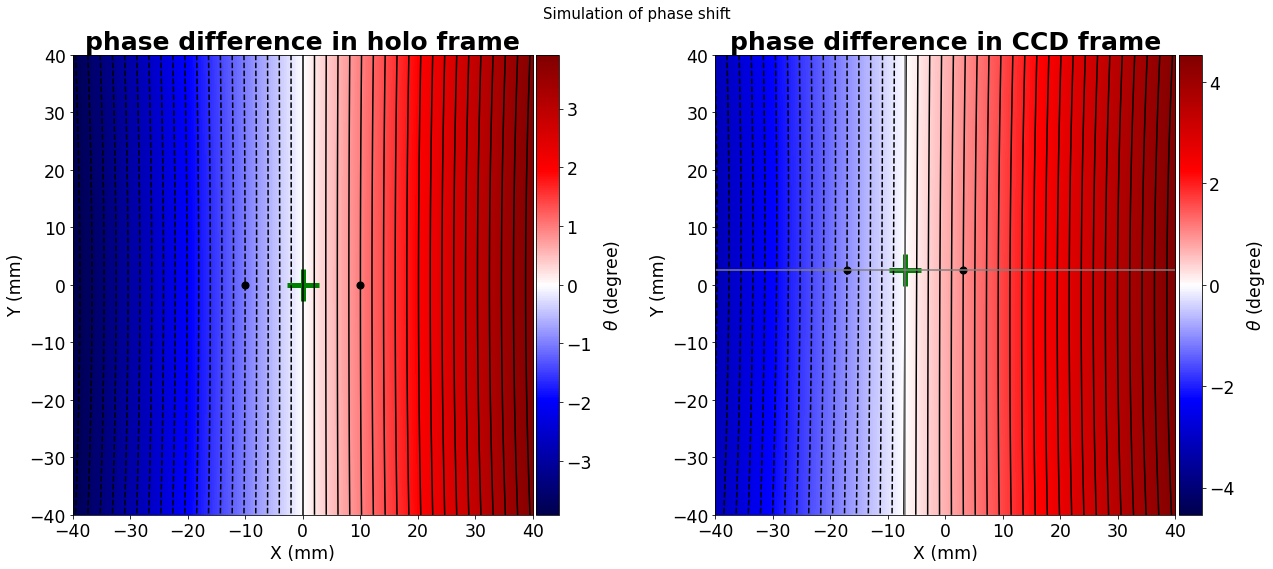

In [36]:
fig = plt.figure(figsize=(18,8))

# relative phase in hologram frame
ax1 = fig.add_subplot(121)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(Z_Phi_holo,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Z_Phi_holo,levels=50,colors='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

xy1_A=np.array([-c_d1/2,0])
xy1_B=np.array([c_d1/2,0])
xy1_Oh=np.array([0,0])

ax1.scatter(xy1_A[0],xy1_A[1],marker="o",color="k",s=50)
ax1.scatter(xy1_B[0],xy1_B[1],marker="o",color="k",s=50)
ax1.scatter(xy1_Oh[0],xy1_Oh[1],marker="+",color="g",s=1000,lw=5)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("phase difference in holo frame",fontweight="bold",fontsize=25)


# relative phase difference in CCD frame when hologram is rotated by an angle beta
ax2 = fig.add_subplot(122)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
maxPhi=np.max(np.abs(Z_Phi_ccd))

im2=ax2.imshow(Z_Phi_ccd,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX),vmin=-maxPhi,vmax=maxPhi)
h2 = ax2.contour(X_ccd,Y_ccd,Z_Phi_ccd,levels=50,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

# inverse rotation from hologram frame to frame in which axis are parralel in 
xy_A = x1y1toxy(xy1_A,c_beta0,x_Oh,y_Oh)
xy_B = x1y1toxy(xy1_B,c_beta0,x_Oh,y_Oh)
xy_Oh = x1y1toxy(xy1_Oh,c_beta0,x_Oh,y_Oh)

# inverse homothetie
XY_A = xytoXY(xy_A,c_Z0)
XY_B = xytoXY(xy_B,c_Z0)
XY_Oh = xytoXY(xy_Oh,c_Z0)

ax2.scatter(XY_A[0],XY_A[1],marker="o",color="k",s=50)
ax2.scatter(XY_B[0],XY_B[1],marker="o",color="k",s=50)
ax2.scatter(XY_Oh[0],XY_Oh[1],marker="+",color="g",s=1000,lw=5)

ax2.axvline(x=c_X_Oh,color="grey")
ax2.axhline(y=c_Y_Oh,color="grey")

ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("phase difference in CCD frame",fontweight="bold",fontsize=25)

plt.suptitle("Simulation of phase shift",fontsize=15)
plt.tight_layout()

### dispersion angle Alpha

In [37]:
Z_Ang_holo=dd_alpha(XX,YY)

In [38]:
X_ccd = np.linspace(XMIN, XMAX, NPIX)
Y_ccd = np.linspace(YMIN, YMAX, NPIX)
XX_ccd, YY_ccd = np.meshgrid(X_ccd, Y_ccd, sparse=False)

# homothetie toward hologram plane
xx_holo=XYtoxy(XX_ccd,c_Z0) 
yy_holo=XYtoxy(YY_ccd,c_Z0) 

# homothetie of point Oh in hologram plane
x_Oh,y_Oh=XYtoxy_2D(c_X_Oh,c_Y_Oh,c_Z0)

# rotation from CCD orientation toward hologram 
(xx1_holo,yy1_holo)=xytox1y1_2D(xx_holo,yy_holo,c_beta0,x_Oh,y_Oh)

# calcul of dispersion angle in hologram frame
Z_Ang_ccd=dd_alpha(xx1_holo,yy1_holo)

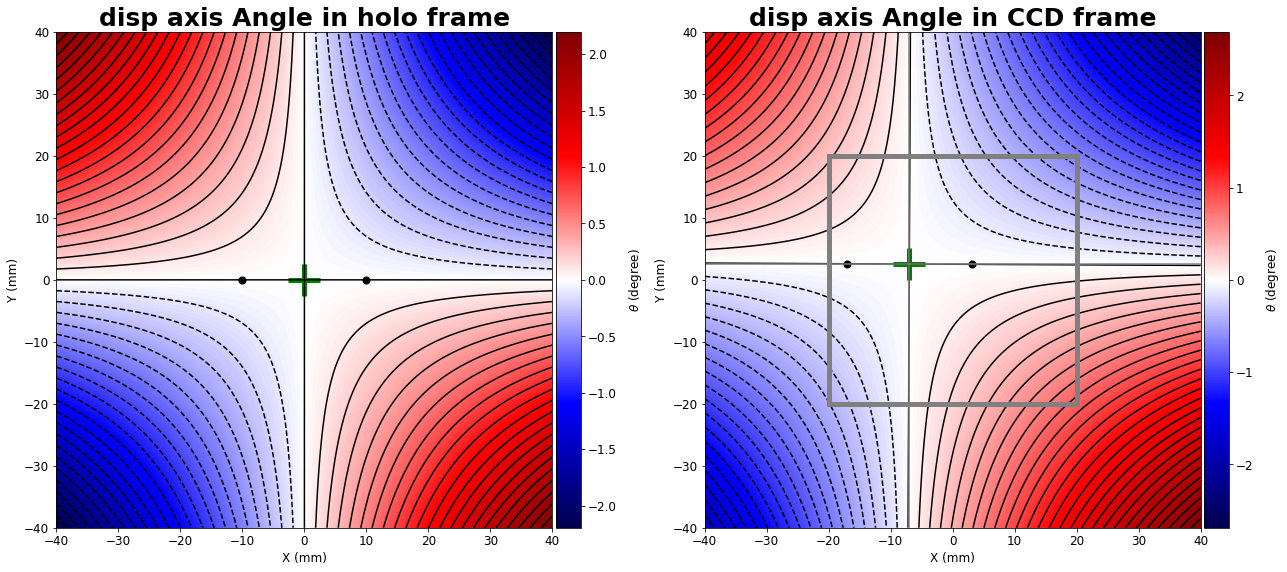

In [122]:
fig = plt.figure(figsize=(18,8))

# dispersion axis in hologram frame (Oh,x1,y1)

ax1 = fig.add_subplot(121)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(Z_Ang_holo,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Z_Ang_holo,levels=50,colors='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

xy1_A=np.array([-c_d1/2,0])
xy1_B=np.array([c_d1/2,0])
xy1_Oh=np.array([0,0])

ax1.scatter(xy1_A[0],xy1_A[1],marker="o",color="k",s=50)
ax1.scatter(xy1_B[0],xy1_B[1],marker="o",color="k",s=50)
ax1.scatter(xy1_Oh[0],xy1_Oh[1],marker="+",color="g",s=1000,lw=5)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("disp axis Angle in holo frame",fontweight="bold",fontsize=25)

# dispersion angle in CCD frame (O,X,Y)

ax2 = fig.add_subplot(122)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)

maxAng=np.max(np.abs(Z_Ang_ccd))
im2=ax2.imshow(Z_Ang_ccd,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX),vmin=-maxAng,vmax=maxAng)
h2 = ax2.contour(X_ccd,Y_ccd,Z_Ang_ccd,levels=50,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

# inverse rotation
xy_A = x1y1toxy(xy1_A,c_beta0,x_Oh,y_Oh)
xy_B = x1y1toxy(xy1_B,c_beta0,x_Oh,y_Oh)
xy_Oh = x1y1toxy(xy1_Oh,c_beta0,x_Oh,y_Oh)

# inverse homothetie
XY_A = xytoXY(xy_A,c_Z0)
XY_B = xytoXY(xy_B,c_Z0)
XY_Oh = xytoXY(xy_Oh,c_Z0)

ax2.scatter(XY_A[0],XY_A[1],marker="o",color="k",s=50)
ax2.scatter(XY_B[0],XY_B[1],marker="o",color="k",s=50)
ax2.scatter(XY_Oh[0],XY_Oh[1],marker="+",color="g",s=1000,lw=5)

ax2.axvline(x=c_X_Oh,color="grey")
ax2.axhline(y=c_Y_Oh,color="grey")

ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("disp axis Angle in CCD frame",fontweight="bold",fontsize=25)


# CCD border
ax2.plot([-20,-20],[-20,20],color="grey",lw=5)
ax2.plot([20,20],[-20,20],color="grey",lw=5)
ax2.plot([-20,20],[-20,-20],color="grey",lw=5)
ax2.plot([-20,20],[20,20],color="grey",lw=5)

plt.tight_layout()

# Generate Files

## N file

In [124]:
N= c_d1/(c_wl0*c_Z1)

In [125]:
N

156.49452269170578

# Hologram center

In [136]:
XYtoCCDpix(c_X_Oh,c_Y_Oh)

(1348.0, 2303.0)

In [134]:
c_X_Oh

-7